In [187]:
from mueller_matrices import M_Retarder, M_Diattenuator, M_rotate, M_LinearPolarizer, stokes2ellipse
from plotting import plotEllipse, plotEllipseStokes
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [282]:
HWP = M_Retarder(theta=0,delta=np.pi/4)
QWP = M_Retarder(theta=np.pi/4,delta=np.pi/2)

HWP
# HWP

Matrix([
[1, 0,                  0,                 0],
[0, 1,                  0,                 0],
[0, 0,  0.707106781186548, 0.707106781186547],
[0, 0, -0.707106781186547, 0.707106781186548]])

In [283]:
def M_inst(e):
    M = sp.Matrix([[1, 0, 0, -1],
                  [1, np.cos(2*np.arctan(e)), 0, -np.sin(2*np.arctan(e))],
                  [1, -0.5*np.cos(2*np.arctan(e)), np.sqrt(3)/2*np.cos(2*np.arctan(e)), -np.sin(2*np.arctan(e))],
                  [1, -0.5*np.cos(2*np.arctan(e)), -np.sqrt(3)/2*np.cos(2*np.arctan(e)), -np.sin(2*np.arctan(e))]])
                   
    return M


#LCP
M_analyzer = sp.Matrix([[1, 0, 0, -1],
                        [0, 0, 0, 0],
                        [0, 0, 0, 0],
                        [-1, 0, 0, 1]])/2

M_analyzerVert = sp.Matrix([[1, -1, 0, 0],
                        [-1, 1, 0, 0],
                        [0, 0, 0, 0],
                        [0, 0, 0, 0]])/2

In [289]:
M_60 = M_rotate(M_analyzerVert, -np.pi/3)
M_120 = M_rotate(M_analyzerVert, -2*np.pi/3)

-1.0 0.0
Matrix([[1.00000000000000], [0], [0], [-1.00000000000000]])


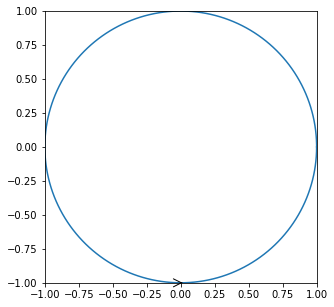

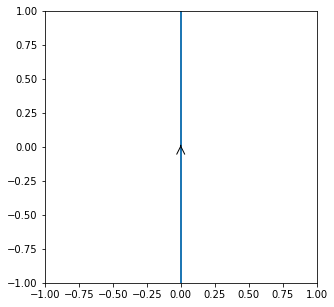

In [306]:
LCA=0.25
LCB=0.5

HWP = M_Retarder(theta=0,delta=LCB*2*np.pi)
QWP = M_Retarder(theta=np.pi/4,delta=LCA*2*np.pi)

S_in = sp.Matrix([1, 1, 0, 0])
S_out = M_analyzer*HWP*QWP*S_in


ellipt,orient=stokes2ellipse(np.array(S_out).astype(np.float64)) # Llinear 0
plotEllipse(ellipt,orient)
# print(S_out)
plotEllipseStokes(1,-1,0,0)

print(ellipt,orient)
print(S_out)

In [ ]:
lca = np.arange(0,1.6,.2)
lcb = np.arange(0,1.6,.2)
del_A = lca*2*np.pi
del_B = lcb*2*np.pi
S_in = sp.Matrix([1, -1, 0, 0])
inputpol = sp.Matrix([1, -1, 0, 0])
random = M_Retarder(theta=np.pi/2,delta=np.pi/2)

for i in del_A:
    for j in del_B:
        
        HWP = M_Retarder(theta=0,delta=i)
        QWP = M_Retarder(theta=np.pi/4,delta=j)
        M_uni = HWP*QWP
        S_outuni = M_uni * inputpol

        ellipt,orient=stokes2ellipse(np.array(S_outuni).astype(np.float64)) # Llinear 0
        plotEllipse(ellipt,orient)

In [303]:
lca = np.arange(-1.5,1.5,0.01)
xx, yy = np.meshgrid(lca,lca)

np.shape(xx)

(300, 300)

In [304]:
%%time
# lca = np.linspace(-1.5,1.5,250)
# lcb = np.linspace(-1.5,1.5,250)
lca = np.arange(-1.5,1.5,0.01)
lcb = np.arange(-1.5,1.5,0.01)
# lca = np.linspace(0,1.6,250)
# lcb = np.linspace(0,1.6,250)
# del_A = lca*2*np.pi
# del_B = lcb*2*np.pi
S_in = sp.Matrix([1, -1, 0, 0])

# get ellipticity, orientation
e = np.empty([len(lca),len(lcb)])
theta = np.empty([len(lca),len(lcb)])
S0 = np.empty([len(lca),len(lcb)])
S1 = np.empty([len(lca),len(lcb)])
S2 = np.empty([len(lca),len(lcb)])
S3 = np.empty([len(lca),len(lcb)])
# final_stokes = np.empty([len(lca),len(lcb),4,1])
for i in range(len(lca)):
    for j in range(len(lcb)):
        M_uni = M_Retarder(theta=0, delta = lcb[j]*2*np.pi) * M_Retarder(theta=np.pi/4, delta = lca[i]*2*np.pi)
        S_out = M_uni * S_in
        S_final = M_analyzer * S_out
        S0[i,j] = S_final[0]
        S1[i,j] = S_final[1]
        S2[i,j] = S_final[2]
        S3[i,j] = S_final[3]
        ellipt,orient=stokes2ellipse(np.array(S_out).astype(np.float64))
        e[i,j] = ellipt
        theta[i,j] = orient

CPU times: user 1min 36s, sys: 344 ms, total: 1min 36s
Wall time: 1min 37s


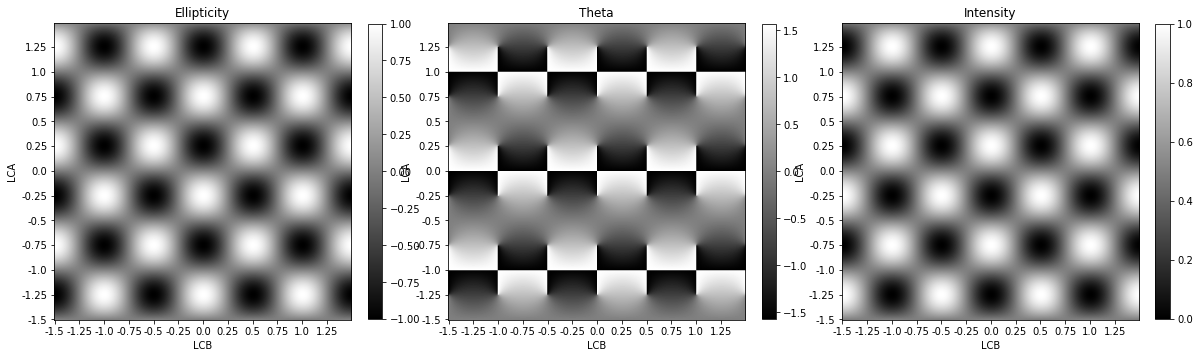

In [307]:
fig, ax = plt.subplots(1,3, figsize=(20,20))
im1 = ax[0].imshow(e, "gray", origin = 'lower')
ax[0].set_title('Ellipticity')
ax[0].set_xlabel('LCB')
ax[0].set_ylabel('LCA')
ax[0].set_xticks(np.arange(0,300,25))
ax[0].set_xticklabels(np.arange(-1.5,1.5,0.25), fontsize=10)
ax[0].set_yticks(np.arange(0,300,25))
ax[0].set_yticklabels(np.arange(-1.5,1.5,0.25), fontsize=10)
fig.colorbar(im1, ax=ax[0], fraction=0.045)

im2 = ax[1].imshow(theta, "gray", origin = 'lower')
ax[1].set_title('Theta')
ax[1].set_xlabel('LCB')
ax[1].set_ylabel('LCA')
ax[1].set_xticks(np.arange(0,300,25))
ax[1].set_xticklabels(np.arange(-1.5,1.5,0.25), fontsize=10)
ax[1].set_yticks(np.arange(0,300,25))
ax[1].set_yticklabels(np.arange(-1.5,1.5,0.25), fontsize=10)
fig.colorbar(im2, ax=ax[1], fraction=0.045)

im3 = ax[2].imshow(S0, "gray", origin = 'lower')
ax[2].set_title('Intensity')
ax[2].set_xlabel('LCB')
ax[2].set_ylabel('LCA')
ax[2].set_xticks(np.arange(0,300,25))
ax[2].set_xticklabels(np.arange(-1.5,1.5,0.25), fontsize=10)
ax[2].set_yticks(np.arange(0,300,25))
ax[2].set_yticklabels(np.arange(-1.5,1.5,0.25), fontsize=10)
fig.colorbar(im3, ax=ax[2], fraction=0.045)

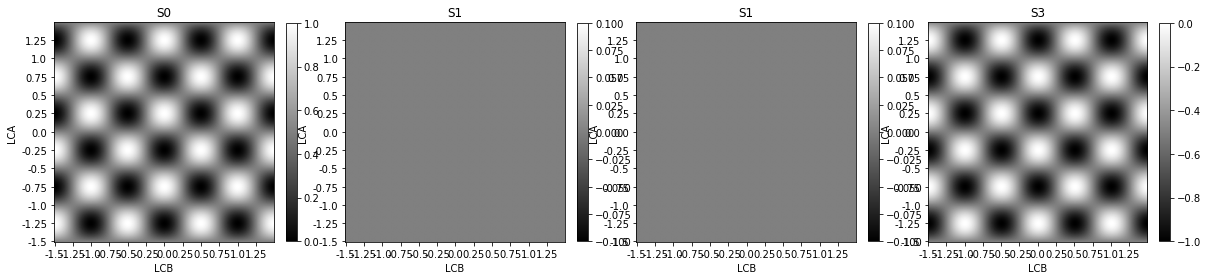

In [311]:
fig, ax = plt.subplots(1,4, figsize=(20,20))
im1 = ax[0].imshow(S0, "gray", origin = 'lower')
ax[0].set_title('S0')
ax[0].set_xlabel('LCB')
ax[0].set_ylabel('LCA')
ax[0].set_xticks(np.arange(0,300,25))
ax[0].set_xticklabels(np.arange(-1.5,1.5,0.25), fontsize=10)
ax[0].set_yticks(np.arange(0,300,25))
ax[0].set_yticklabels(np.arange(-1.5,1.5,0.25), fontsize=10)
fig.colorbar(im1, ax=ax[0], fraction=0.045)


im2 = ax[1].imshow(S1, "gray", origin = 'lower')
ax[1].set_title('S1')
ax[1].set_xlabel('LCB')
ax[1].set_ylabel('LCA')
ax[1].set_xticks(np.arange(0,300,25))
ax[1].set_xticklabels(np.arange(-1.5,1.5,0.25), fontsize=10)
ax[1].set_yticks(np.arange(0,300,25))
ax[1].set_yticklabels(np.arange(-1.5,1.5,0.25), fontsize=10)
fig.colorbar(im2, ax=ax[1], fraction=0.045)

im3 = ax[2].imshow(S2, "gray", origin = 'lower')
ax[2].set_title('S1')
ax[2].set_xlabel('LCB')
ax[2].set_ylabel('LCA')
ax[2].set_xticks(np.arange(0,300,25))
ax[2].set_xticklabels(np.arange(-1.5,1.5,0.25), fontsize=10)
ax[2].set_yticks(np.arange(0,300,25))
ax[2].set_yticklabels(np.arange(-1.5,1.5,0.25), fontsize=10)
fig.colorbar(im3, ax=ax[2], fraction=0.045)

im4 = ax[3].imshow(S3, "gray", origin = 'lower')
ax[3].set_title('S3')
ax[3].set_xlabel('LCB')
ax[3].set_ylabel('LCA')
ax[3].set_xticks(np.arange(0,300,25))
ax[3].set_xticklabels(np.arange(-1.5,1.5,0.25), fontsize=10)
ax[3].set_yticks(np.arange(0,300,25))
ax[3].set_yticklabels(np.arange(-1.5,1.5,0.25), fontsize=10)
fig.colorbar(im4, ax=ax[3], fraction=0.045)

In [ ]:
ILCP = np.empty((len(e[:,0]),len(e[0,:])))
I0 = np.empty((len(e[:,0]),len(e[0,:])))
I60 = np.empty((len(e[:,0]),len(e[0,:])))
I120 = np.empty((len(e[:,0]),len(e[0,:])))

for i in range(len(final_stokes[:,0])):
    for j in range(len(final_stokes[0,:]))

In [294]:
ILCP = np.empty((len(e[:,0]),len(e[0,:])))
I0 = np.empty((len(e[:,0]),len(e[0,:])))
I60 = np.empty((len(e[:,0]),len(e[0,:])))
I120 = np.empty((len(e[:,0]),len(e[0,:])))

for i in range(len(e[:,0])):
    for j in range(len(e[0,:])):
        S_out = M_inst(e[i,j]) * S_final
        ILCP[i,j] = S0[0]
        I0[i,j] = S_out[1]
        I60[i,j] = S_out[2]
        I120[i,j] = S_out[3]

In [319]:
M_inst(1)

Matrix([
[1,                     0,                     0,   -1],
[1,  6.12323399573677e-17,                     0, -1.0],
[1, -3.06161699786838e-17,  5.30287619362453e-17, -1.0],
[1, -3.06161699786838e-17, -5.30287619362453e-17, -1.0]])

In [318]:
M_inst(1)[:,1]

Matrix([
[                    0],
[ 6.12323399573677e-17],
[-3.06161699786838e-17],
[-3.06161699786838e-17]])

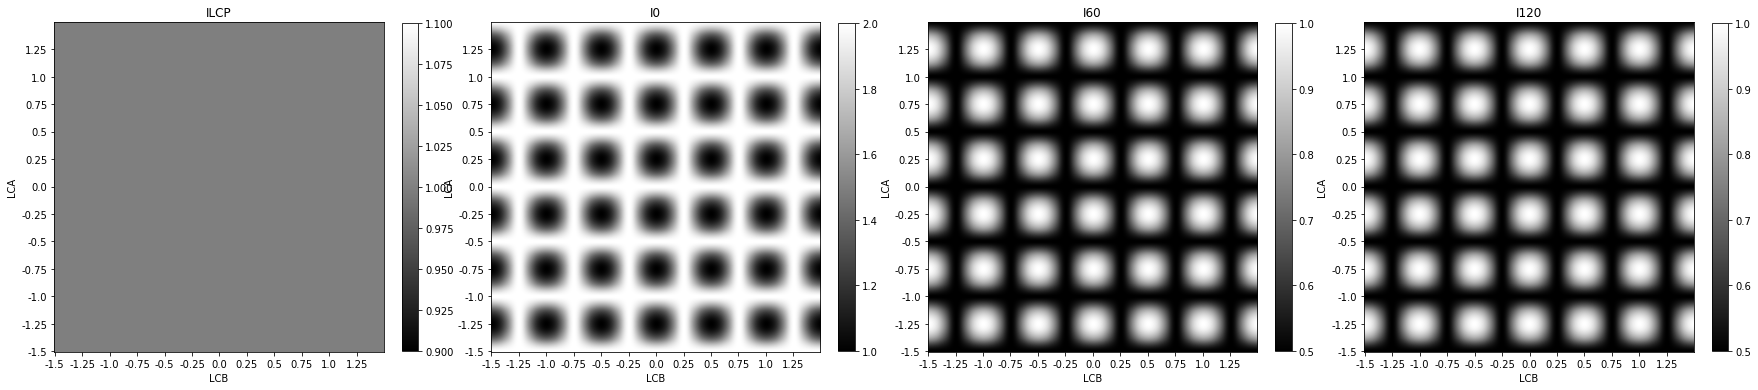

<Figure size 900x600 with 0 Axes>

In [297]:
fig, ax = plt.subplots(1,4, figsize=(30,30))
plt.figure(dpi=150)
im1 = ax[0].imshow(ILCP, "gray", origin = 'lower')
ax[0].set_title('ILCP')
ax[0].set_xlabel('LCB')
ax[0].set_ylabel('LCA')
ax[0].set_xticks(np.arange(0,300,25))
ax[0].set_xticklabels(np.arange(-1.5,1.5,0.25), fontsize=10)
ax[0].set_yticks(np.arange(0,300,25))
ax[0].set_yticklabels(np.arange(-1.5,1.5,0.25), fontsize=10)
fig.colorbar(im1, ax=ax[0], fraction=0.045)

im2 = ax[1].imshow(I0, "gray", origin = 'lower')
ax[1].set_title('I0')
ax[1].set_xlabel('LCB')
ax[1].set_ylabel('LCA')
ax[1].set_xticks(np.arange(0,300,25))
ax[1].set_xticklabels(np.arange(-1.5,1.5,0.25), fontsize=10)
ax[1].set_yticks(np.arange(0,300,25))
ax[1].set_yticklabels(np.arange(-1.5,1.5,0.25), fontsize=10)
fig.colorbar(im2, ax=ax[1], fraction=0.045)

im3 = ax[2].imshow(I60, "gray", origin = 'lower')
ax[2].set_title('I60')
ax[2].set_xlabel('LCB')
ax[2].set_ylabel('LCA')
ax[2].set_xticks(np.arange(0,300,25))
ax[2].set_xticklabels(np.arange(-1.5,1.5,0.25), fontsize=10)
ax[2].set_yticks(np.arange(0,300,25))
ax[2].set_yticklabels(np.arange(-1.5,1.5,0.25), fontsize=10)
fig.colorbar(im3, ax=ax[2], fraction=0.045)

im3 = ax[3].imshow(I120, "gray", origin = 'lower')
ax[3].set_title('I120')
ax[3].set_xlabel('LCB')
ax[3].set_ylabel('LCA')
ax[3].set_xticks(np.arange(0,300,25))
ax[3].set_xticklabels(np.arange(-1.5,1.5,0.25), fontsize=10)
ax[3].set_yticks(np.arange(0,300,25))
ax[3].set_yticklabels(np.arange(-1.5,1.5,0.25), fontsize=10)
fig.colorbar(im3, ax=ax[3], fraction=0.045)

In [ ]:
M_uni=  M_Retarder(theta=0,delta=np.pi) * M_Retarder(theta=np.pi/4,delta=np.pi/2)

inputpol = sp.Matrix([-1, 1, 0, 0])
S_outuni = M_uni * inputpol

ellipt,orient=stokes2ellipse(np.array(S_outuni).astype(np.float64)) # Llinear 0
plotEllipse(ellipt,orient)

In [232]:
np.max(I60)

1.5

In [10]:
lca = np.arange(0.01,1.6,.01)
lcb = np.arange(0.01,1.6,.01)

In [6]:
len(lca)

159